# Skalierung der Daten

# Laden der Pakete

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# the scaler - for min-max scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Laden der Daten

In [2]:
X_train = pd.read_csv("Xtrain_k_one_hot.csv")
X_test = pd.read_csv("Xtest_k_one_hot.csv")
ytrain = pd.read_csv("ytrain.csv")
ytest = pd.read_csv("ytest.csv")
print("Shape of X Train: {}".format(X_train.shape))
print("Shape of X Test: {}".format(X_test.shape))
print("Shape of y Train: {}".format(ytrain.shape))
print("Shape of y Test: {}".format(ytest.shape))

Shape of X Train: (8672, 175)
Shape of X Test: (2168, 175)
Shape of y Train: (8672, 1)
Shape of y Test: (2169, 1)


In [3]:
X_train.head()

,Rating,Reviews,Price,Last Updated,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_FINANCE,Category_FAMILY,Category_MEDICAL,Category_GAME,...,Genres_Card;Brain Games,Genres_Communication;Creativity,Genres_Books & Reference;Creativity,Genres_Casual;Education,Genres_Adventure;Brain Games,Genres_Role Playing;Education,Genres_Comics;Creativity,Genres_Lifestyle;Pretend Play,Genres_Role Playing;Brain Games,Genres_Travel & Local;Action & Adventure
0,4.4,17915,0.0,2018-07-18,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.7,321,0.0,2017-03-14,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,12,0.0,2013-09-05,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.7,303,0.0,2018-07-22,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.5,80904,0.0,2018-07-05,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train.columns

Index(['Rating', 'Reviews', 'Price', 'Last Updated',
       'Category_TRAVEL_AND_LOCAL', 'Category_VIDEO_PLAYERS',
       'Category_FINANCE', 'Category_FAMILY', 'Category_MEDICAL',
       'Category_GAME',
       ...
       'Genres_Card;Brain Games', 'Genres_Communication;Creativity',
       'Genres_Books & Reference;Creativity', 'Genres_Casual;Education',
       'Genres_Adventure;Brain Games', 'Genres_Role Playing;Education',
       'Genres_Comics;Creativity', 'Genres_Lifestyle;Pretend Play',
       'Genres_Role Playing;Brain Games',
       'Genres_Travel & Local;Action & Adventure'],
      dtype='object', length=175)

In [5]:
X_train.iloc[:,1:20].head()

,Reviews,Price,Last Updated,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_FINANCE,Category_FAMILY,Category_MEDICAL,Category_GAME,Category_SOCIAL,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_MAPS_AND_NAVIGATION,Category_HEALTH_AND_FITNESS,Category_COMMUNICATION,Category_LIBRARIES_AND_DEMO,Category_DATING,Category_TOOLS,Category_LIFESTYLE
0,17915,0.0,2018-07-18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,321,0.0,2017-03-14,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12,0.0,2013-09-05,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,303,0.0,2018-07-22,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,80904,0.0,2018-07-05,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Wir wollen die transformierten Daten nicht skalieren, daher wählen wir im nächsten Schritt nur die Variablen wo wir auch skalieren wollen.

Reviews, Rating and last updated werden skaliert
Für Last Updated noch nicht gemacht

In [6]:
X_train_sel = X_train[['Reviews', 'Rating']]

X_test_sel = X_test[['Reviews', 'Rating']]
print("Shape ausgelesenes Format Train: {}".format(X_train_sel.shape))
print("Shape ausgelesenes Format Test: {}".format(X_test_sel.shape))

Shape ausgelesenes Format Train: (8672, 2)
Shape ausgelesenes Format Test: (2168, 2)


In [7]:
X_train_sel.head()

,Reviews,Rating
0,17915,4.4
1,321,3.7
2,12,5.0
3,303,4.7
4,80904,4.5


# Standardisation

In [8]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train_sel)

StandardScaler()

Wir trainieren nur den scaler für die Variablen an, welche numerische Werte enthalten und nicht die als Dummyvariablen umgeformt worden sind. Daher geben wir beim Scaler und der Umformung die jeweiligen Spaltennamen an.

In [9]:
# transform train and test sets
X_train_scale_sel = scaler.transform(X_train_sel)
X_test_scale_sel= scaler.transform(X_test_sel)

Mit dem folgenden Code können wir die Mittelwerte und die Varianz der Skalierung anschauen.

In [10]:
# the scaler stores the mean of the features, learned from train set

print("Mittelwerte für die Skalierung für die jeweiligen Spalten: {}".format(scaler.mean_))

# the scaler stores the standard deviation deviation of the features,
# learned from train set

print("Varianz für die Skalierung für die jeweiligen Spalten: {}".format(scaler.scale_))

Mittelwerte für die Skalierung für die jeweiligen Spalten: [4.34980897e+05 4.20619234e+00]
Varianz für die Skalierung für die jeweiligen Spalten: [2.87975301e+06 4.80589260e-01]


Sklearn transformiert ein pandas Dataframe in ein numpy array um. Im nächsten Schritt erstellen wir wieder ein pandas dataframe.

In [11]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

X_train_scale_sel = pd.DataFrame(X_train_scale_sel, columns=X_train_sel.columns)
X_test_scale_sel = pd.DataFrame(X_test_scale_sel, columns=X_test_sel.columns)

Schauen wir uns die ersten fünf Zeilen an.

In [12]:
X_train_sel.head()

,Reviews,Rating
0,17915,4.4
1,321,3.7
2,12,5.0
3,303,4.7
4,80904,4.5


In [13]:
X_train_scale_sel.head()

,Reviews,Rating
0,-0.144827,0.403271
1,-0.150937,-1.053274
2,-0.151044,1.651738
3,-0.150943,1.027505
4,-0.122954,0.611349


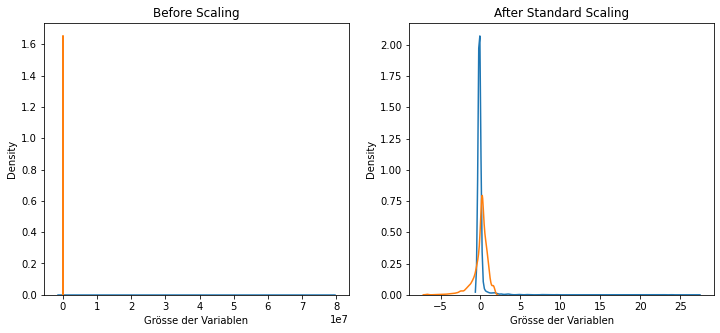

In [14]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_sel['Reviews'], ax=ax1)
sns.kdeplot(X_train_sel['Rating'], ax=ax1)
ax1.set_xlabel("Grösse der Variablen")

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scale_sel['Reviews'], ax=ax2)
sns.kdeplot(X_train_scale_sel['Rating'], ax=ax2)
ax2.set_xlabel("Grösse der Variablen")
plt.show()

## Concatenate Data and Save
In diesem Abschnitt werden wir nun die skalierten Daten mit den one-hot encoded Daten verbinden.

In [15]:
X_train.drop(['Reviews', 'Rating'], axis = 1, inplace=True)
X_test.drop(['Reviews', 'Rating'], axis =1, inplace = True)
print("Shape of prepared train data set: {}".format(X_train.shape))
print("Shape of prepared test data set: {}".format(X_test.shape))

Shape of prepared train data set: (8672, 173)
Shape of prepared test data set: (2168, 173)


In [16]:
X_train_prep_tot = pd.concat([X_train_scale_sel, X_train], axis = 1, ignore_index = False)
X_test_prep_tot = pd.concat([X_test_scale_sel, X_test], axis = 1, ignore_index = False)
print("Shape of prepared train data set: {}".format(X_train_prep_tot.shape))
print("Shape of prepared test data set: {}".format(X_test_prep_tot.shape))

Shape of prepared train data set: (8672, 175)
Shape of prepared test data set: (2168, 175)


In [17]:
X_train_prep_tot

,Reviews,Rating,Price,Last Updated,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_FINANCE,Category_FAMILY,Category_MEDICAL,Category_GAME,...,Genres_Card;Brain Games,Genres_Communication;Creativity,Genres_Books & Reference;Creativity,Genres_Casual;Education,Genres_Adventure;Brain Games,Genres_Role Playing;Education,Genres_Comics;Creativity,Genres_Lifestyle;Pretend Play,Genres_Role Playing;Brain Games,Genres_Travel & Local;Action & Adventure
0,-0.144827,0.403271,0.0,2018-07-18,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.150937,-1.053274,0.0,2017-03-14,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.151044,1.651738,0.0,2013-09-05,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.150943,1.027505,0.0,2018-07-22,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.122954,0.611349,0.0,2018-07-05,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,-0.017494,0.611349,0.0,2018-07-30,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8668,-0.141238,-0.220963,0.0,2017-03-21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8669,-0.012583,0.195193,0.0,2018-08-06,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8670,-0.150341,1.027505,0.0,2018-05-20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Daten Speichern

In [18]:
X_train_prep_tot.to_csv("Xtrain_k_one_hot_scaled.csv",index=False)
X_test_prep_tot.to_csv("Xtest_k_one_hot_scaled.csv",index=False)